<a href="https://colab.research.google.com/github/GuadalupeLopezAsc/tree_decision-/blob/main/Proyecto_Final_Arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelo Analítico**
Eaborado por:

*   *López Ascencio Guadalupe*



# Árboles de decisión

**Introducción:** Se nos proporcionó una base de datos de 55,692 individuos junto con sus revisiones médicas (peso, estatura, graduación visual, colesterol, trigliceridos, etc.) teniendo un total de 27 variables.

**Objetivo:** determinar la presencia o ausencia de tabaquismo a través de bioseñales

## 1. Análisis exploratorio

In [ ]:
#Descargamos las librerías que usaremos
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
#Subimos la base de datos
smoking = pd.read_csv('https://raw.githubusercontent.com/GuadalupeLopezAsc/tree_decision-/main/smoking.csv')

In [ ]:
#Visualizamos el encabezado de nuestra base de datos
smoking.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
#Verificamos el tamaño de las filas y columnas
smoking.shape

(55692, 27)

In [ ]:
#Verificamos que nuestra variable objetivo sea binaria, la cual determina cuál individuo es fumador y cuál no
smoking['smoking'].unique()

array([0, 1])

**Observación:** Para el diseño del modelo, es necesario escoger una variable que tenga respuestas categóricas, así como la variable de fumadores, donde 0 es *no fumador* y 1 *fumador*.

In [ ]:
#Hacemos un conteo de los datos
smoking['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

<Axes: xlabel='smoking', ylabel='count'>

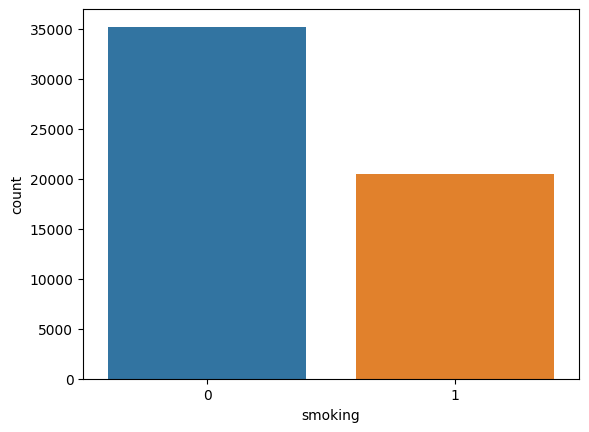

In [ ]:
#Revisamos la proporción de fumadores
sns.countplot(x='smoking',data=smoking)

In [ ]:
#Calculamos la proporción
no = 35237/55692
si = 20455/55692
print(no)
print(si)

0.6327120591826474
0.3672879408173526


Contamos con un 37% de indivuduos con ausencia de tabaquismo y un 63%  con presencia de signos de tabaquismo

In [ ]:
#Verificamos que gender sea una variable binaria
smoking['gender'].unique()

array(['F', 'M'], dtype=object)

<Axes: xlabel='gender', ylabel='count'>

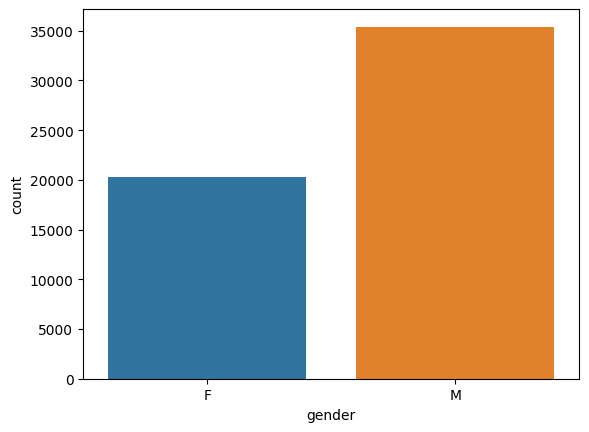

In [ ]:
#Revisamos la proporción de hombres y mujeres
sns.countplot(x='gender',data=smoking)

In [ ]:
smoking['gender'].value_counts()

M    35401
F    20291
Name: gender, dtype: int64

In [ ]:
#Calculamos la proporción
Male = 35401/55692
Female = 20291/55692
print(Male)
print(Female)

0.6356568268332974
0.36434317316670256


Nuestra población cuenta con un registro del 64% de hombres y 36% de mujeres

In [ ]:
# Consulta para contar mujeres fumadoras
count_female_smokers = smoking[(smoking['gender'] == 'F') & (smoking['smoking'] == 1)].shape[0]

# Imprimir el resultado
print(f"El número de mujeres fumadoras es: {count_female_smokers}")

El número de mujeres fumadoras es: 859


In [ ]:
count_female_smokers/20291

0.042334039722044255

El porcentaje de mujeres fumadoras es de un 4.2%

In [ ]:
#Verificamos que tartar sea una variable binaria
smoking['tartar'].unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='tartar', ylabel='count'>

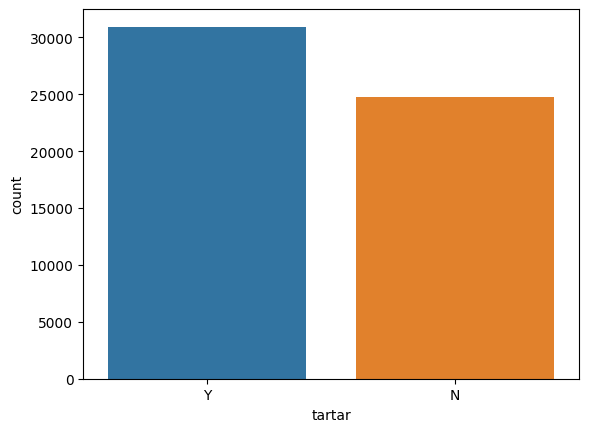

In [ ]:
#Revisamos la proporción de fumadores
sns.countplot(x='tartar',data=smoking)

In [ ]:
smoking['tartar'].value_counts()

Y    30940
N    24752
Name: tartar, dtype: int64

In [ ]:
#Calculamos la proporción
Yes = 30940/55692
No = 24752/55692
print(Yes)
print(No)

0.5555555555555556
0.4444444444444444


Contamos con una población en donde el 55% tiene presencia de sarro y un 45% que no tiene presencia de sarro

In [ ]:
smoking['dental caries'].value_counts()

0    43811
1    11881
Name: dental caries, dtype: int64

In [ ]:
#Calculamos la proporción
no = 43811/55692
si = 11881/55692
print(no)
print(si)

0.7866659484306543
0.21333405156934568


Tenemos una población en donde el 78% tiene presencia de caries y un 22% que no tiene presencia de caries

Recordemos que para poder realizar un modelo de árbol de decisión necesitamos que nuestras variables tengan caracteres númericos, por lo cual, asignaremos 0's y 1's a las variables binarias

In [ ]:
#Cambiamos las respuestas con cadena de texto a respuestas númericas
smoking['gender'] = smoking['gender'].replace({'F': 0, 'M': 1})

In [ ]:
smoking['tartar'] = smoking['tartar'].replace({'N': 0, 'Y': 1})
smoking

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,1,0
55688,55681,0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,1,0
55689,55683,0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,0,0
55690,55684,1,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,0,0


In [ ]:
#Eliminamos la variables Oral y ID ya que no tienen información valiosa para el modelo a realizar
columnas_a_eliminar = ['ID', 'oral' ]
smoking = smoking.drop(columnas_a_eliminar, axis=1)

##2. Selección de variables (variable objetivo y variable(s) predictora(s))

* **Gráfica: Importancia de las características en el Árbol de Decisión**

Nos permite ver qué tanta importancia tienen las variables respecto a nuestra variable objetivo. Es una ayuda visual, en la cual podemos observar y determinar qué variables contribuyen más y qué variables contribuyen menos en la construcción de nuestro árbol de decisiones.

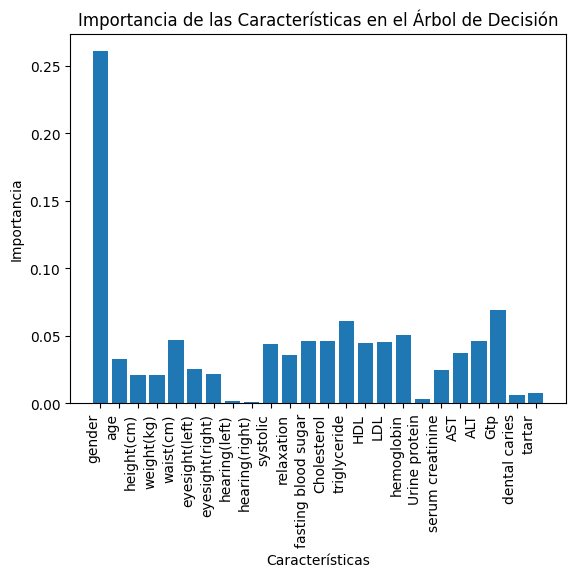

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Tomamos 'smoking' como nuestra DataFrame

# Separamos las columnas predictoras (X) de la variable objetivo (Y)
X = smoking.drop('smoking', axis=1)  # Ajustamos 'smoking' con el nombre real de la variable objetivo
Y = smoking['smoking']

# Entrenamos un clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, Y)

# Obtener la importancia de cada característica
importances = clf.feature_importances_

# Obtenemos nombres de características
feature_names = X.columns

# Creamos un gráfico de barras para visualizar la importancia de las características
plt.bar(feature_names, importances)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.xticks(rotation=90, ha='right')  # Rotar los nombres de las características para mayor legibilidad
plt.show()


* **Matriz de correlación**

Nos permite saber qué variables tienen mayor relación lineal respecto a nuestra variable objetivo *Smoking*

In [ ]:
import pandas as pd

# Supongamos que tu DataFrame se llama 'data' y la variable objetivo es '26.Fumador'
# Asegúrate de tener tus datos cargados adecuadamente antes de ejecutar esto

# Calculamos la matriz de correlación
correlation_matrix = smoking.corr()

# Extraemos las correlaciones con respecto a '26.Fumador'
correlation_with_target = correlation_matrix['smoking'].sort_values(ascending=False)

# Imprimimos los resultados
print("Correlaciones con 'smoking':")
print(correlation_with_target)


Correlaciones con 'smoking':
smoking                1.000000
gender                 0.510340
hemoglobin             0.400678
height(cm)             0.396675
weight(kg)             0.302780
triglyceride           0.251799
Gtp                    0.236619
waist(cm)              0.226259
serum creatinine       0.216812
relaxation             0.108309
dental caries          0.103857
fasting blood sugar    0.100279
tartar                 0.098655
ALT                    0.097338
systolic               0.073109
eyesight(right)        0.063017
eyesight(left)         0.061204
AST                    0.059253
Urine protein          0.014267
hearing(right)        -0.018855
hearing(left)         -0.023209
Cholesterol           -0.028548
LDL                   -0.045220
age                   -0.162557
HDL                   -0.178470
Name: smoking, dtype: float64


Podemos observar que nuestra variable objetivo "Smoking" tiene menor correlación con la variable "ID".

 Las variables que tienen una mayor correlación positiva son: "gender", "hemoglobin", "height". Mientras que las variables que tienen una correlación negativa son: "LDL", "age", "HDL".

In [ ]:
#Quitamos las columnas que tienen menor porcentaje de importancia característica en el árbol de decisión según nuestra gráfica
columnas_a_eliminar = ['height(cm)', 'weight(kg)', 'hearing(left)', 'hearing(right)', 'eyesight(left)',	'eyesight(right)', 'relaxation', 'Urine protein', 'serum creatinine', 'dental caries']
smoking = smoking.drop(columnas_a_eliminar, axis=1)

#En donde .drop elimina una varible deseada y (axis=1 indica que queremos eliminar una columna)

In [ ]:
#Visualizamos la base de datos modificada
smoking

,gender,age,waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,AST,ALT,Gtp,tartar,smoking
0,0,40,81.3,114.0,94.0,215.0,82.0,73.0,126.0,12.9,18.0,19.0,27.0,1,0
1,0,40,81.0,119.0,130.0,192.0,115.0,42.0,127.0,12.7,22.0,19.0,18.0,1,0
2,1,55,80.0,138.0,89.0,242.0,182.0,55.0,151.0,15.8,21.0,16.0,22.0,0,1
3,1,40,88.0,100.0,96.0,322.0,254.0,45.0,226.0,14.7,19.0,26.0,18.0,1,0
4,0,40,86.0,120.0,80.0,184.0,74.0,62.0,107.0,12.5,16.0,14.0,22.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,75.0,110.0,89.0,213.0,99.0,75.0,118.0,12.3,14.0,7.0,10.0,1,0
55688,0,45,70.0,101.0,89.0,166.0,69.0,73.0,79.0,14.0,20.0,12.0,14.0,1,0
55689,0,55,68.5,117.0,88.0,158.0,77.0,79.0,63.0,12.4,17.0,11.0,12.0,0,0
55690,1,60,78.0,133.0,107.0,210.0,79.0,48.0,146.0,14.4,20.0,19.0,18.0,0,0


In [ ]:
#Nos cercioramos de que nuestros datos no contengan vacíos para aplicar nuestro modelo
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   waist(cm)            55692 non-null  float64
 3   systolic             55692 non-null  float64
 4   fasting blood sugar  55692 non-null  float64
 5   Cholesterol          55692 non-null  float64
 6   triglyceride         55692 non-null  float64
 7   HDL                  55692 non-null  float64
 8   LDL                  55692 non-null  float64
 9   hemoglobin           55692 non-null  float64
 10  AST                  55692 non-null  float64
 11  ALT                  55692 non-null  float64
 12  Gtp                  55692 non-null  float64
 13  tartar               55692 non-null  int64  
 14  smoking              55692 non-null  int64  
dtypes: float64(11), int64(4)
memory usag

* **Mapa de Calor: Matriz de correlación**

A través de ésta gráfica, podemos tener una perspectiva más amplia, y comparar qué variables tienen mayor correlación entre si y decidir si tenemos que eliminar alguna otra variable.

Text(0.5, 1.0, 'Mapa de calor para nuestro dataframe')

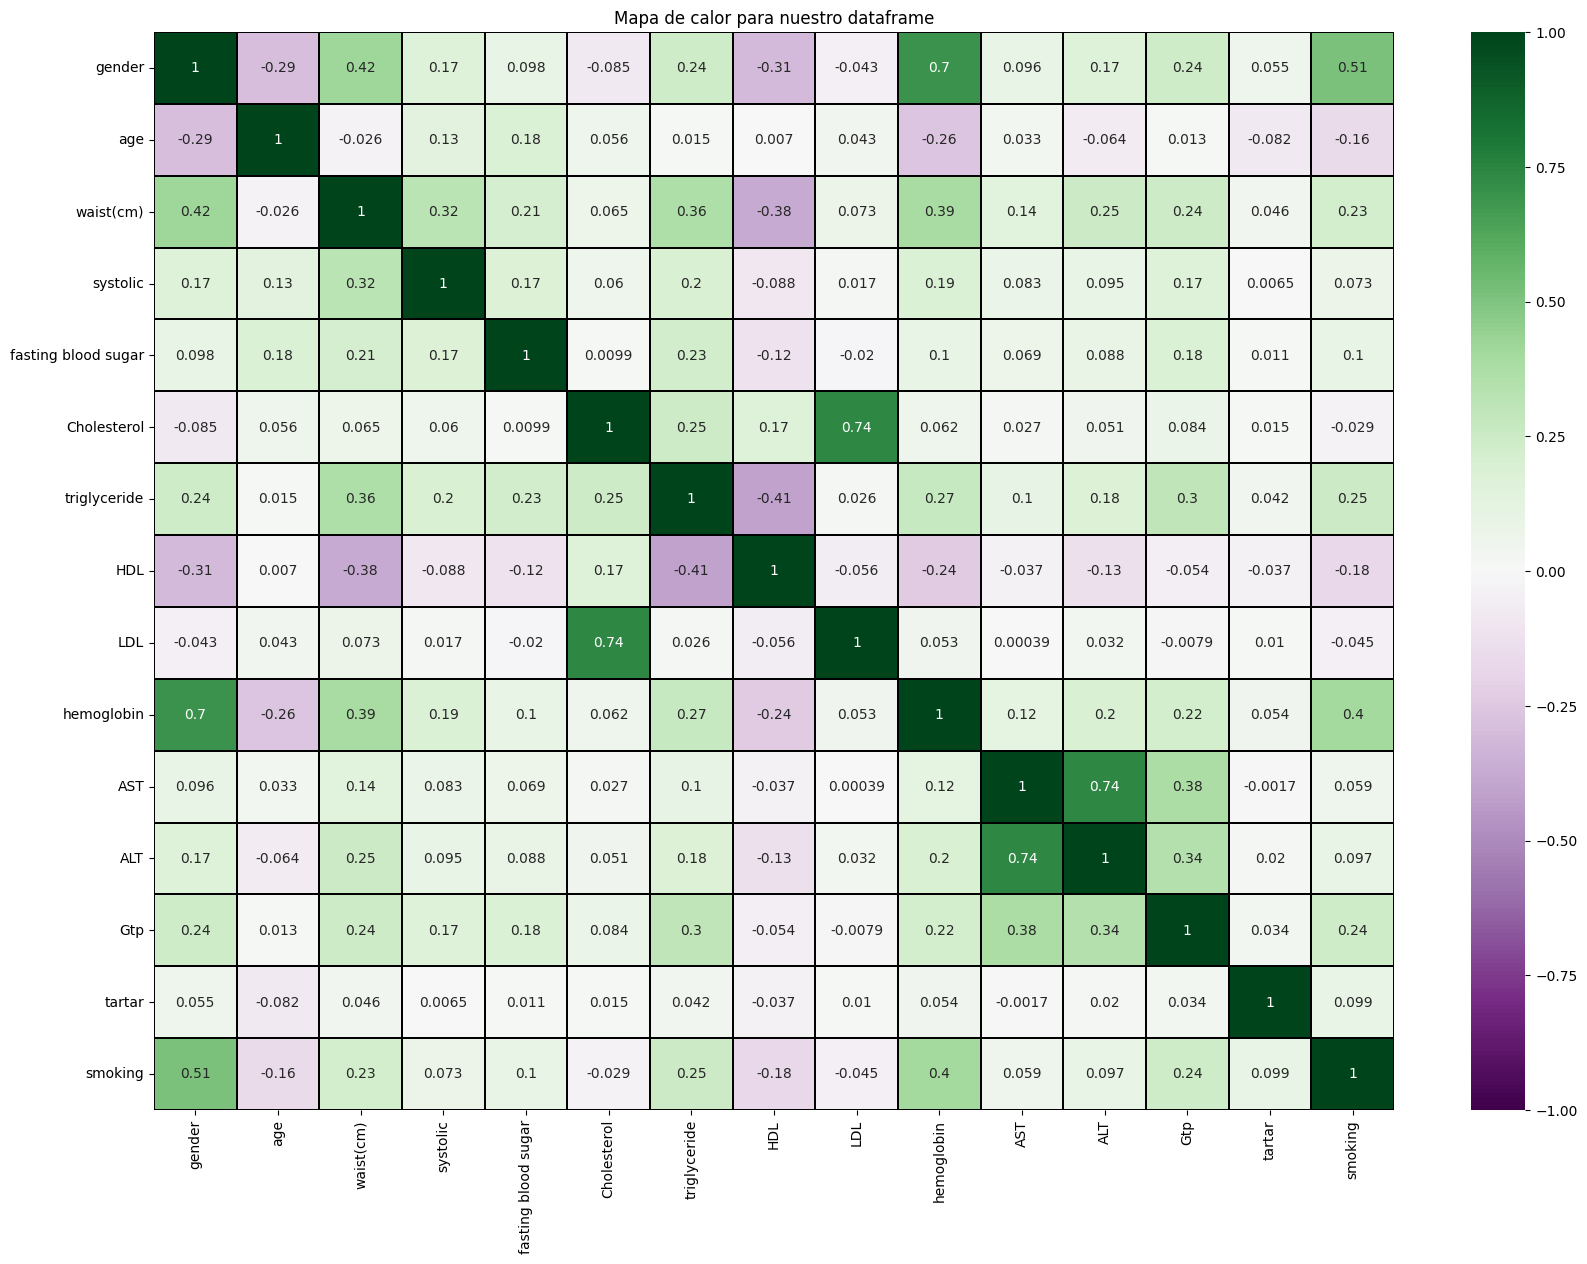

In [ ]:
correlacion = smoking.corr()

plt.figure(figsize=(20, 14))
grafica_calor = sns.heatmap(correlacion,
                            annot = True,
                            linewidths = 0.01,
                            linecolor = 'black',
                            vmin = -1,
                            cmap = 'PRGn'
                            )
plt.title('Mapa de calor para nuestro dataframe')

# annot siendo verdadero pondra el valor dentro de cada cuadro
# linewidth es poner un color de line con su tamaño, cmap es el color en combinaciones
#vmin valor con menor correlacion

* En este caso notamos que existen variables con alto nivel de correlación en el caso de 'LDL' y 'Cholesterol' ya que 'LDL' es un tipo de colesterol "bueno" por lo cual la descartaremos al igual que a 'HDL' que también es un tipo de colesterol.
* De la misma manera existe correlación entre las variables 'AST' y 'ALT' ya que ambos son 2 tipos de enzimas que se encuentra en el hígado, el corazón y otros tejidos por lo cual decidimos solo quedarnos con 'ALT'

In [ ]:
#Eliminamos las variables que tienen correlación alta respecto a nuestra relación objetivo
columnas_a_eliminar = [ 'HDL', 'LDL', 'AST']
smoking = smoking.drop(columnas_a_eliminar, axis=1)

#En donde .drop elimina una varible deseada y (axis=1 indica que queremos eliminar una columna)

In [ ]:
#Base final
smoking

,gender,age,waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,hemoglobin,ALT,Gtp,tartar,smoking
0,0,40,81.3,114.0,94.0,215.0,82.0,12.9,19.0,27.0,1,0
1,0,40,81.0,119.0,130.0,192.0,115.0,12.7,19.0,18.0,1,0
2,1,55,80.0,138.0,89.0,242.0,182.0,15.8,16.0,22.0,0,1
3,1,40,88.0,100.0,96.0,322.0,254.0,14.7,26.0,18.0,1,0
4,0,40,86.0,120.0,80.0,184.0,74.0,12.5,14.0,22.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,75.0,110.0,89.0,213.0,99.0,12.3,7.0,10.0,1,0
55688,0,45,70.0,101.0,89.0,166.0,69.0,14.0,12.0,14.0,1,0
55689,0,55,68.5,117.0,88.0,158.0,77.0,12.4,11.0,12.0,0,0
55690,1,60,78.0,133.0,107.0,210.0,79.0,14.4,19.0,18.0,0,0


Text(0.5, 1.0, 'Mapa de calor para nuestro dataframe')

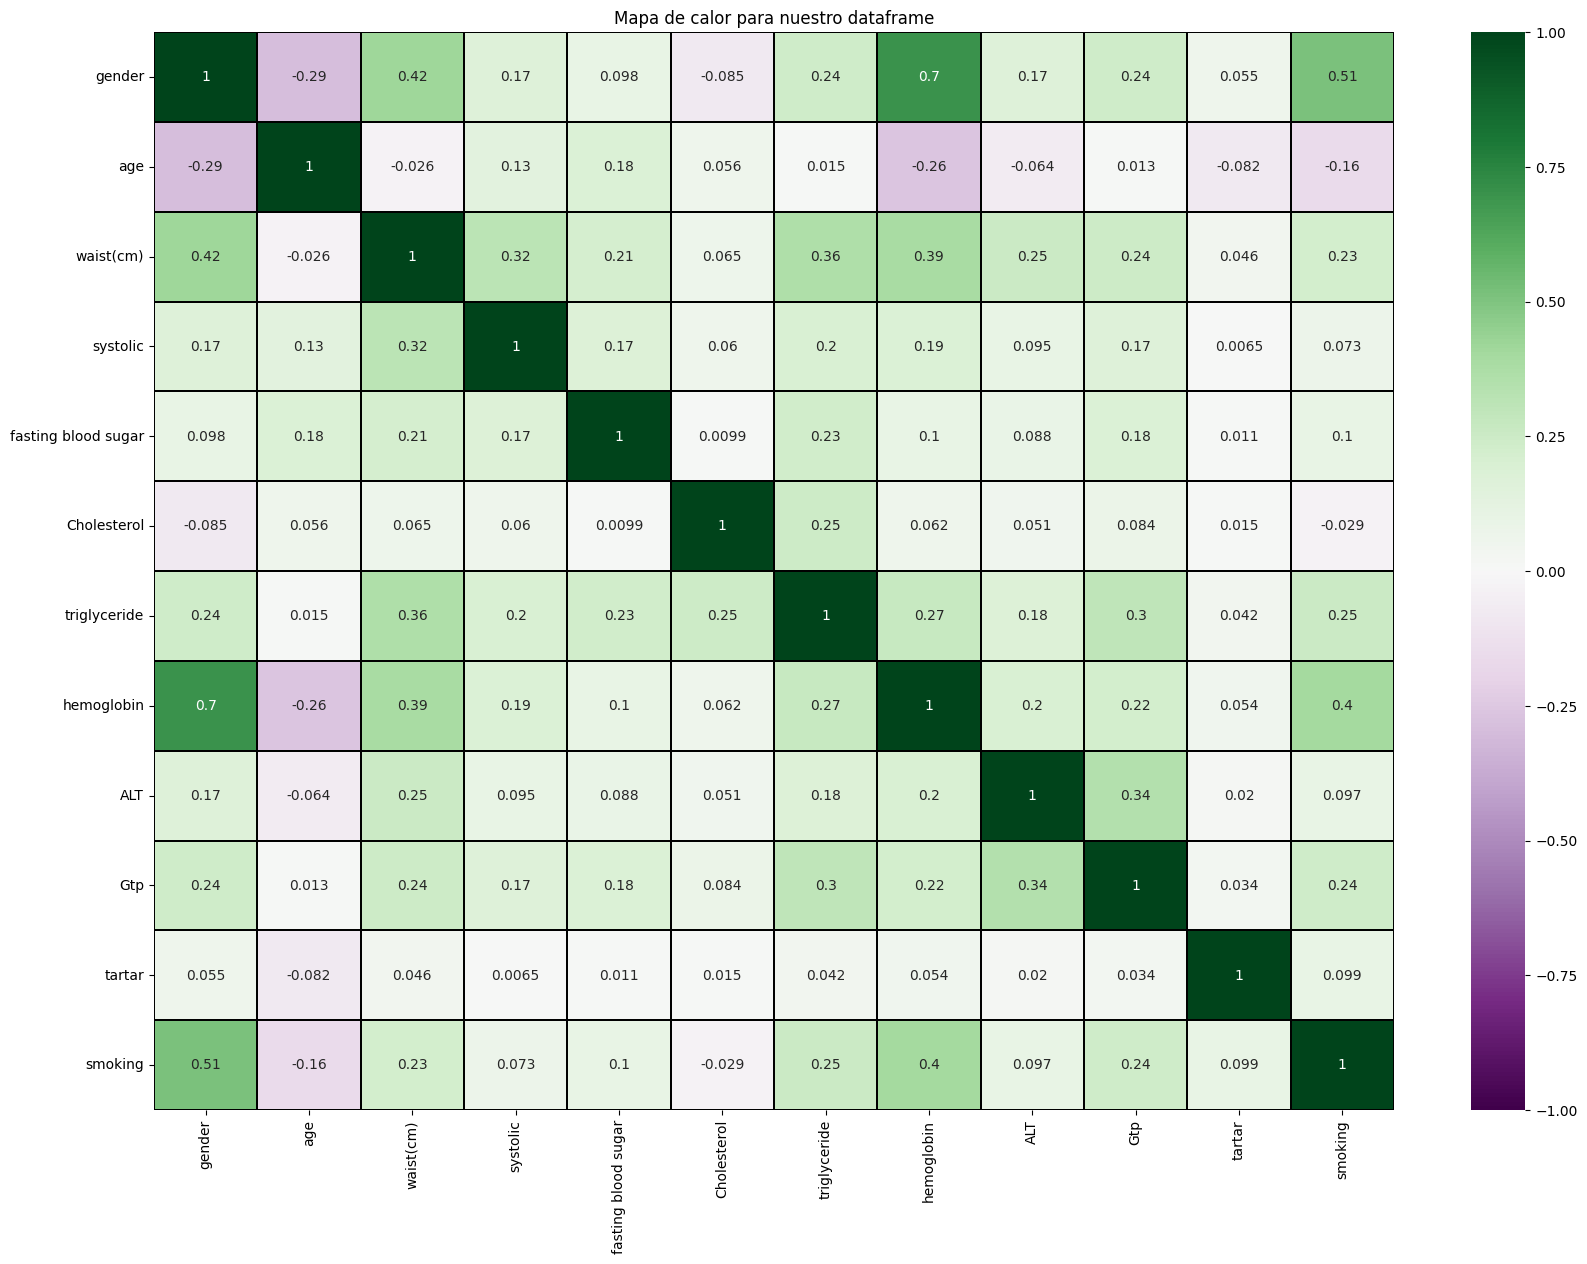

In [ ]:
#Verificamos que no exista colinealidad entre nuestras variables
correlacion = smoking.corr()

plt.figure(figsize=(20, 14))
grafica_calor = sns.heatmap(correlacion,
                            annot = True,
                            linewidths = 0.01,
                            linecolor = 'black',
                            vmin = -1,
                            cmap = 'PRGn'
                            )
plt.title('Mapa de calor para nuestro dataframe')

# annot siendo verdadero pondra el valor dentro de cada cuadro
# linewidth es poner un color de line con su tamaño, cmap es el color en combinaciones
#vmin valor con menor correlacion

##3. Modelo Árbol de Decisión

In [ ]:
#Quitamos nuestra variable objetivo 'Smoking'
X = smoking.drop('smoking', axis=1)  # Ajusta 'smoking' con el nombre real de la variable objetivo
X.head()

,gender,age,waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,hemoglobin,ALT,Gtp,tartar
0,0,40,81.3,114.0,94.0,215.0,82.0,12.9,19.0,27.0,1
1,0,40,81.0,119.0,130.0,192.0,115.0,12.7,19.0,18.0,1
2,1,55,80.0,138.0,89.0,242.0,182.0,15.8,16.0,22.0,0
3,1,40,88.0,100.0,96.0,322.0,254.0,14.7,26.0,18.0,1
4,0,40,86.0,120.0,80.0,184.0,74.0,12.5,14.0,22.0,0


In [ ]:
#Definimos nuestra variable objetivo
Y = smoking['smoking']

In [ ]:
#Verificamos su tamaño
smoking['smoking'].count()

55692

In [ ]:
#Importamos las librerías para nuestro modelo de predicción
#Usamos 'trains_test_split' para que divida nuestros datos de manera aleatoria, tanto de entrenamiento (train) y prueba (test)
from sklearn.model_selection import train_test_split

In [ ]:
#De las pruebas realizadas, se concluyó que el mejor procentaje para test_size es del 30%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)

In [ ]:
#Verificamos el tamaño de los datos de entrenamiento
X_train.shape

(38984, 11)

In [ ]:
#Verificamos el tamaño de los datos de prueba
X_test.shape

(16708, 11)

In [ ]:
#Verificamos el tamaño de nuestros datos
X.shape

(55692, 11)

In [ ]:
#Importamos paquetería para el modelo de árbol de clasificación
from sklearn.tree import plot_tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arbol = DecisionTreeClassifier()

In [ ]:
#Insertamos al modelo nuestras variables entrenadas
arbol.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
#Obtenemos predicciones de nuestra variable de prueba
predicciones=arbol.predict(X_test)

In [ ]:
#Obtenemos predicciones
predicciones

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
#Observamos que en efecto, se obtengan resultados binarios, como nuestra variable objetivo, 'Smoking'.
Y_test.head()

51574    1
15799    0
40706    0
47740    1
13256    1
Name: smoking, dtype: int64

In [ ]:
#Verificamos que nuestra variable de prueba contenga el 30% de información
Y_test.shape

(16708,)

In [ ]:
#Importamos paqueterías para obtener las matrices de precisión y confusión
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Matriz de precisión
print(classification_report(Y_test, predicciones))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     10539
           1       0.70      0.70      0.70      6169

    accuracy                           0.78     16708
   macro avg       0.76      0.76      0.76     16708
weighted avg       0.78      0.78      0.78     16708



* **Precision (Precisión):** La proporción de instancias clasificadas como positivas que eran realmente positivas.

${Precision} = \frac{True Positives}{True Positives + False Positives}$

* **Recall (Recuperación o Sensibilidad):** La proporción de instancias positivas que fueron correctamente identificadas por el modelo.

${Recall} = \frac{True Positives}{True Positives + False Negatives}$

* **F1-score (Puntuación F1):** La media armónica de precision y recall. Es una métrica que tiene en cuenta ambas precision y recall.

${F_1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

* **Support (Soporte):** El número real de ocurrencias de la clase en el conjunto de prueba.

* **Accuracy (Exactitud):** La proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.

In [ ]:
#Matriz de confusión
print(confusion_matrix(Y_test,predicciones))

[[8693 1846]
 [1827 4342]]


In [ ]:
import seaborn as sns

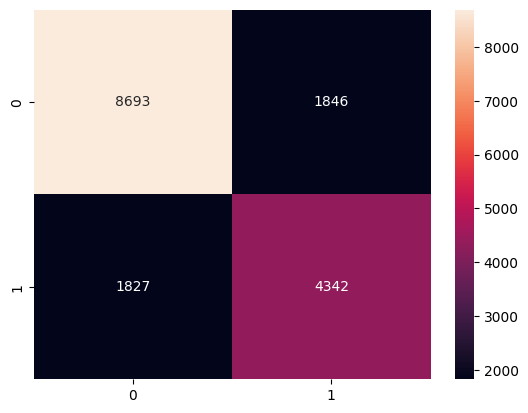

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predicciones)

# Crear un mapa de calor con anotaciones, especificando el formato como 'd' (entero)
sns.heatmap(conf_matrix, annot=True, fmt='d')

# Mostramos el gráfico
plt.show()


 **Análisis de la matriz de confusión**
* Hay 8693 individuos cuyo resultado real es clase 0 y 4342 individuos cuyo resultado real es clase  1
* A la hora de predecir se obtuvieron 8693+1827=10,520 con clase 0 y 1846+4342=6188 individuos con clase 1
* Diagonal derecha cuyo valor en la columna fumadores fue correctamente predicho
* Diagonal izquierda cuyo valor en la columna fumadores fue incorrecta predicho

* **Precisón del modelo:**

In [ ]:
#Calculamos la precisión global del modelo
import numpy as np
Precisión_Global =  np.sum(conf_matrix.diagonal())/np.sum(conf_matrix) #PG= [Diagonal, valor predicho correcto] / [Suma individuos matriz]
Precisión_Global

0.7801651903279866

* **Precisión por cada clase:**

In [ ]:
#Precisión de la clase 0
Precisión_0 = ((conf_matrix[0,0]))/sum(conf_matrix[0,]) #P_0= [Individuos clase 0 predichos correctamente]/[Suma de individuos de clase 0]
Precisión_0

0.8248410665148496

In [ ]:
#Precisión de la clase 1
Precisión_1 = ((conf_matrix[1,1]))/sum(conf_matrix[1,]) #P_1= [Individuos clase 1 predichos correctamente]/[Suma de individuos de clase 1]
Precisión_1

0.7038417895931269

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, predicciones))

Accuracy: 0.7801651903279866


In [ ]:
from sklearn import tree

In [ ]:
#tree.plot_tree(arbol)

In [ ]:
#Designamos hasta cuántas ramas queremos mostrar de nuestro árbol de decisión
arbol = DecisionTreeClassifier(max_depth = 3)

In [ ]:
arbol_fum = arbol.fit(X_train,Y_train)
arbol_fum

DecisionTreeClassifier(max_depth=3)

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

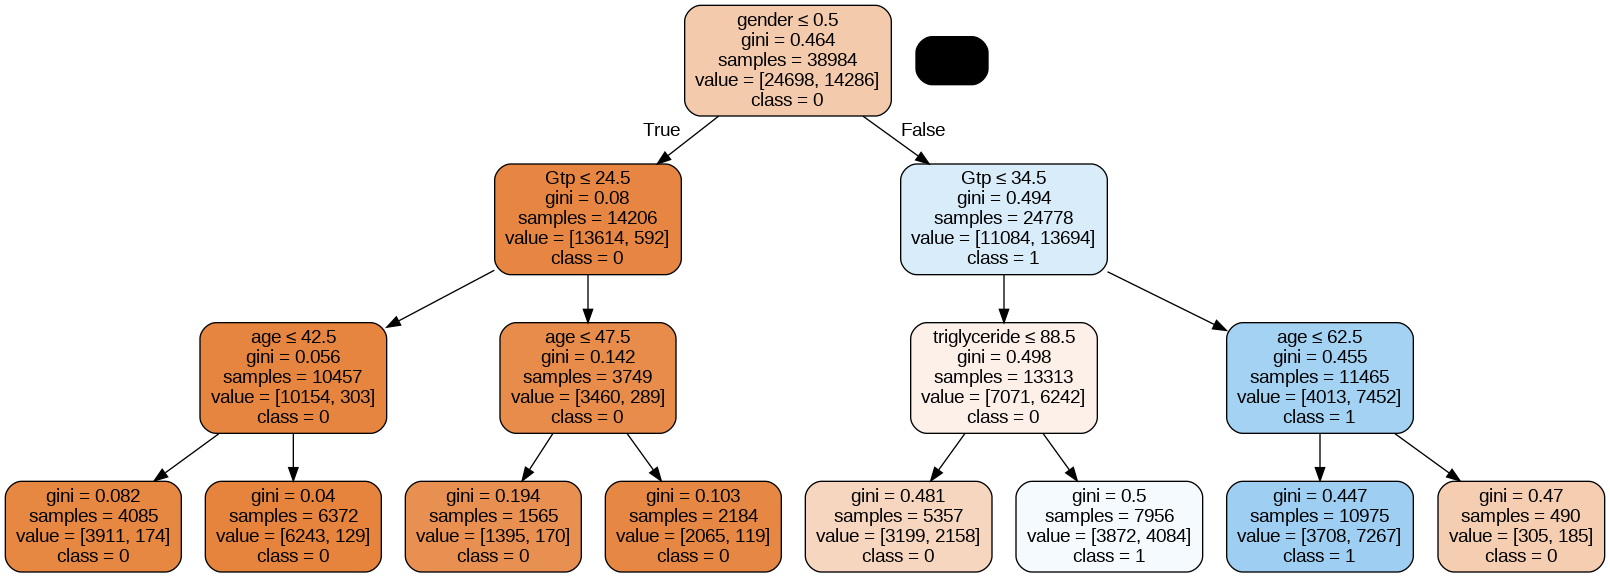

In [ ]:
# Importar la función export_graphviz de la biblioteca sklearn.tree
from sklearn.tree import export_graphviz

# Importar la clase StringIO de la biblioteca six
from six import StringIO

# Importar la función Image de la biblioteca IPython.display
from IPython.display import Image

# Importar la biblioteca pydotplus para trabajar con gráficos DOT
import pydotplus

# Crear un objeto StringIO para almacenar el código DOT generado por export_graphviz
dot_data = StringIO()

# Utilizar export_graphviz para generar el código DOT y almacenarlo en dot_data
export_graphviz(arbol_fum, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names =list(X.columns.values),
                class_names=['0', '1'])

# Crear un objeto de gráfico a partir del código DOT almacenado en dot_data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Escribir la representación gráfica del árbol en un archivo PNG llamado 'diabetes.png'
graph.write_png('smoker.png')

# Mostrar la imagen del árbol en el cuaderno de Jupyter
Image(graph.create_png())


Nuestro *Árbol de decisión* nos dice lo siguiente.

En la primer variable, ¿el género nuestro individuo es menor a 0.5 (es decir, es hombre 1 o mujer 0)? De ser falso, nos vamos a la rama derecha, de ser verdadero, nos dirijimos a la rama izquierda. Así, al inicio de cada hoja, tendremos una variable en la cuál basarnos, y responder si cumple con dadas características o no. Hasta el final tendremos la clase, la cual determina si el individuo es fumador o no es fumador.

**Gini:** es un indicador de la pureza del nodo

**Samples:** Cantidad de individuos que cumplen con dadas condiciones

**Value:** Cantidad de individuos que son no fumadores (clase 0) y los que son fumadores (clase 1)

$[clase=0, clase=1]$

**Class:** Es el valor máximo dentro de Value

In [ ]:
import matplotlib.pyplot as plt
plt.savefig('smoker.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
#tomamos una muestra de nuestros datos entrenados
c = X_train.sample()
c

,gender,age,waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,hemoglobin,ALT,Gtp,tartar
17726,1,60,73.0,100.0,111.0,158.0,49.0,13.1,17.0,14.0,1


In [ ]:
#Calculo obtenido del contenido del árbol
7267/10975

0.6621412300683371

In [ ]:
y_pred = arbol.predict(X)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
smoking['pred'] = y_pred

In [ ]:
smoking.sample(10)[['smoking','pred']]

,smoking,pred
36565,0,0
47121,1,0
31149,0,0
42471,1,1
44859,0,0
27309,0,0
290,1,1
19415,0,0
1442,0,0
37611,0,0


In [ ]:
(smoking['smoking'] == smoking['pred']).sum()


40634

Otro tipo de árbol de decisión utilizando el calculo de la entriopia.


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_leaf=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7352166626765622


Al tener un menor porcentaje de efectividad, decidimos quedarnos con el primer modelo.

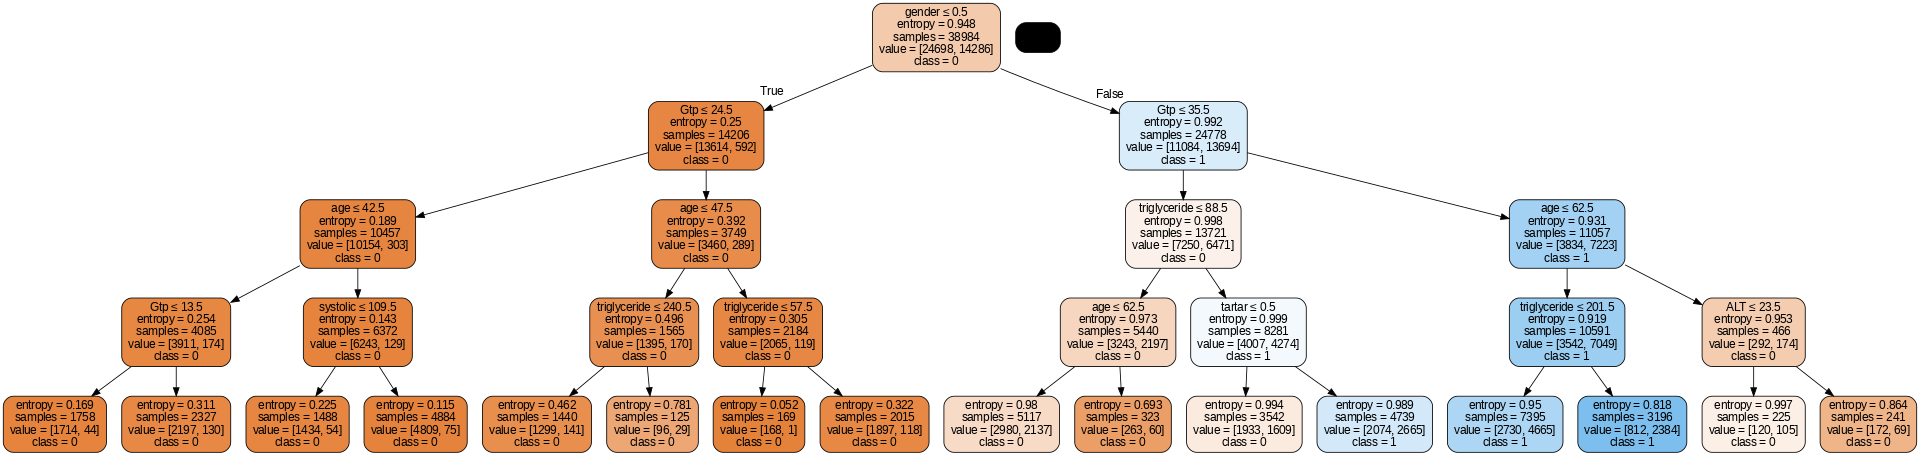

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=list(X.columns.values), class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Establecer el tamaño del gráfico
graph.set_size('20x15')  # Puedes ajustar estos valores según tu preferencia

# Guardar el gráfico en un archivo PNG
graph.write_png('Smoking.png')

# Mostrar la imagen en el cuaderno de Jupyter
Image(graph.create_png())


##4. Conclusiones

El Árbol de Decisión es un modelo predictivo que nos ayuda en la toma de decisiones. El objetivo de éste modelo era predecir qué individuo es fumador.
Se hicieron dos árboles de decisión, uno con parámetro Gini y otro con entropía. El que obtuvo mayor porcentaje de precisión fué el de parámetro Gini.


Al final obtuvimos una precisión global del 78.016% (obtenido por medio de la matriz de confusión). La precisión para el caso 0 es del 82.484%, y la precisión para el caso 1 es del 70.384%


Podemos observar que nuestro modelo es más certero para el caso no fumador que para el caso fumador, y esto en parte puede derivarse a que, en el caso de las mujeres, tan sólo 4.2% son fumadoras, teniendo poca información sobre la población fumadora femenina.

Por el porcentaje de precisión, consideramos que podemos mejorar nuestra base  para usar los árboles de decisión.

Consideramos que para tener aún mayor certeza, podemos agregar otras variables, en las cuales se estudien más a fondo la población fumadora, como es la capacidad pulmonar, enfermedades pulmonares, enfermedades en la garganta, entre otras. Así como tener más individuos fumadores para observar sus caraterísticas biológicas.



##5. Fuente
https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking
